In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import regex as re
import spacy
#nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud, STOPWORDS

Data source:  
https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset

First, let's bring in the first few lines of code to see what we are working with

In [13]:
chunks = []

r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32} 

# Store the json chunks
reader = pd.read_json('data/yelp_academic_dataset_review.json',
                      lines=True,
                      chunksize=1000,
                      dtype=r_dtypes,
                      orient='records')

# For loop to append each chunk into the chunks list
for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id'])\
                             .query("`date` >= '2018-12-31'")
        chunks.append(reduced_chunk)

# Concatenate each chunk into a single dataframe        
reviews = pd.concat(chunks, ignore_index=True)

In [14]:
# Let's look at the data
reviews.head()

,business_id,stars,useful,funny,cool,text,date
0,z7em5co2qckbAXoDGXynsA,5.0,0,0,0,The food is INCREDIBLE! We didn't have time to...,2019-01-04 02:18:09
1,M0r9lUn2gLFYgIwIfG8-bQ,5.0,0,0,0,"We had a great time, and excellent service. Al...",2019-01-06 11:48:21
2,itAhmbhHOyQQparfwicjDQ,5.0,0,0,0,My favorite coffee shop in New Orleans for sur...,2019-01-27 15:08:14
3,-3AooxIkg38UyUdlz5oXdw,4.0,2,0,1,"Old school circa 1979, the cozy, intimate banq...",2019-02-17 20:28:26
4,TVGuOv0Nc0omLXtGKVOwdQ,1.0,0,0,0,"All Lowes in 20 mile radius, stopped\nstocking...",2019-02-17 17:17:56


In [15]:
reviews_funny = reviews.loc[(reviews.funny > 0) & (reviews.stars > 3), :].copy()
reviews_funny.dropna(subset=['text'], inplace=True) # drop empty reviews
print(f"There are {reviews_funny.shape[0]} reviews marked funny at least once.")

There are 142964 reviews marked funny at least once.


In [16]:
# Update the set of stopwords to include some found in the reviews.
stop_words = STOPWORDS.update(["area", "will", 'wasnt', 'n', 'nthe'])


In [17]:
text_big_funny = "".join(str(reviews_funny.text.values))

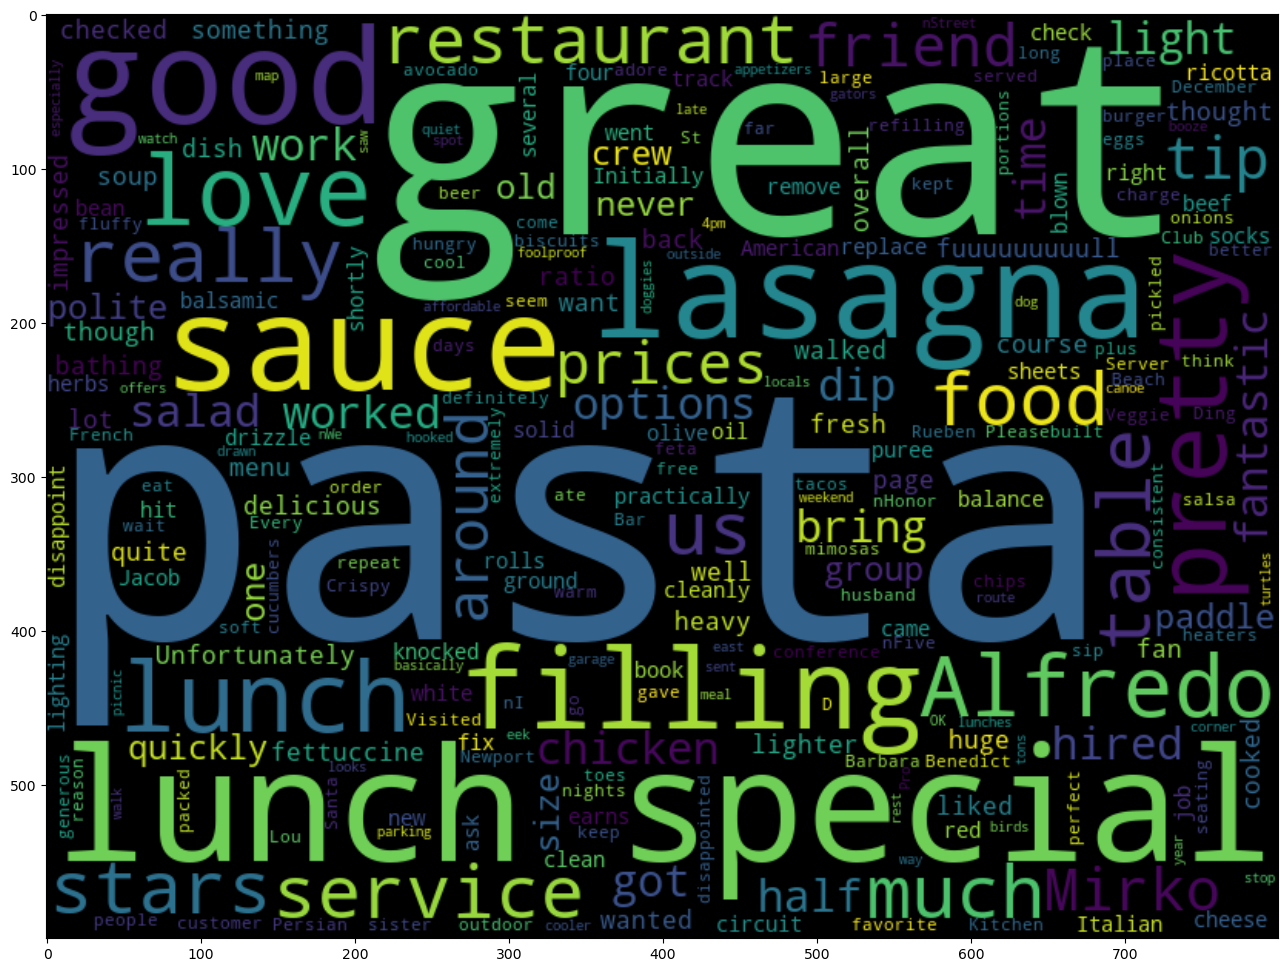

In [19]:
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text_big_funny)
wc.to_file("yelp_wordcloud_funny.jpg")
plt.imshow(wc, interpolation = 'bilinear')

In [20]:
reviews_cool = reviews.loc[(reviews.cool > 0) & (reviews.stars >3), :].copy()
reviews_cool.dropna(subset=['text'], inplace=True)
print(f"There are {reviews_cool.shape[0]} reviews marked cool at least once.")
text_big_cool = "".join(str(reviews_cool.text.values))

There are 362348 reviews marked cool at least once.


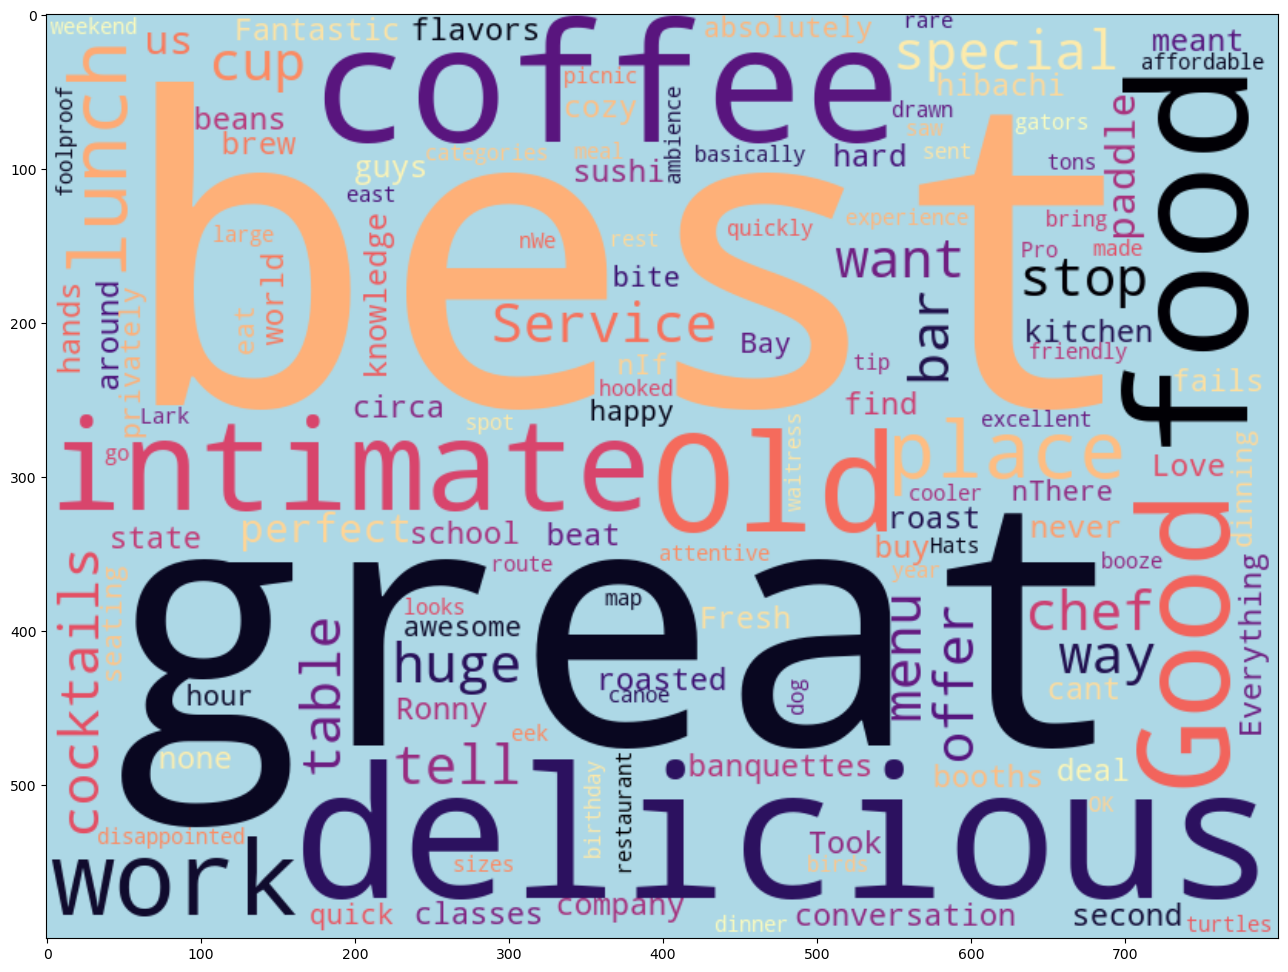

In [22]:
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS, 
    background_color="lightblue", colormap="magma").generate(text_big_cool)
wc.to_file("yelp_wordcloud_cool.jpg")
plt.imshow(wc, interpolation = 'bilinear')